In [3]:
import pandas as pd
df=pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9529,2024-01-04,370.670013,373.100006,367.170013,367.940002,367.940002,20901500
9530,2024-01-05,368.970001,372.059998,366.500000,367.750000,367.750000,20987000
9531,2024-01-08,369.299988,375.200012,369.010010,374.690002,374.690002,23134000
9532,2024-01-09,372.010010,375.989990,371.190002,375.790009,375.790009,20830000


In [4]:
df=df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9529,2024-01-04,367.940002
9530,2024-01-05,367.750000
9531,2024-01-08,374.690002
9532,2024-01-09,375.790009


In [5]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9529    2024-01-04
9530    2024-01-05
9531    2024-01-08
9532    2024-01-09
9533    2024-01-10
Name: Date, Length: 9534, dtype: object

In [6]:
import datetime
def str_to_datetime(s):
  split=s.split('-')
  year, month, date=int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=date)

datetime_object=str_to_datetime('1986-03-19')
datetime_object


datetime.datetime(1986, 3, 19, 0, 0)

In [7]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-a4c74efbab4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9529   2024-01-04
9530   2024-01-05
9531   2024-01-08
9532   2024-01-09
9533   2024-01-10
Name: Date, Length: 9534, dtype: datetime64[ns]

In [8]:
df.index=df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-01-04,367.940002
2024-01-05,367.750000
2024-01-08,374.690002


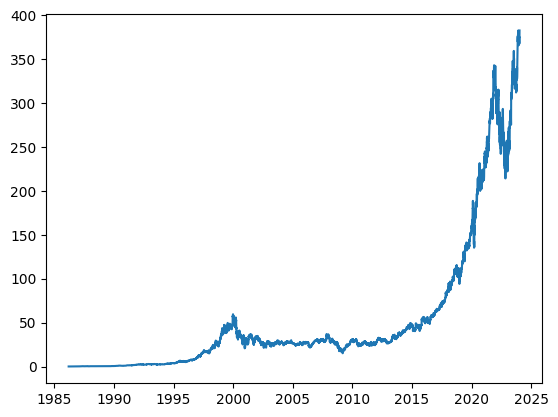

In [9]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '1986-03-18',
                                '2024-01-10',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-03-18,0.097222,0.100694,0.102431,0.099826
1,1986-03-19,0.100694,0.102431,0.099826,0.098090
2,1986-03-20,0.102431,0.099826,0.098090,0.095486
3,1986-03-21,0.099826,0.098090,0.095486,0.092882
4,1986-03-24,0.098090,0.095486,0.092882,0.090278
...,...,...,...,...,...
9526,2024-01-04,376.040009,370.869995,370.600006,367.940002
9527,2024-01-05,370.869995,370.600006,367.940002,367.750000
9528,2024-01-08,370.600006,367.940002,367.750000,374.690002
9529,2024-01-09,367.940002,367.750000,374.690002,375.790009


In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X=middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
  Y=df_as_np[:, -1]
  return dates, X.astype(np.float32), Y.astype(np.float32)
dates, X, y=windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((9531,), (9531, 3, 1), (9531,))

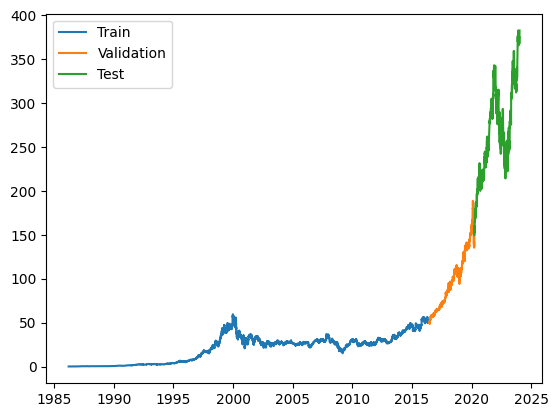

In [12]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
239/239 [==============================] - 7s 11ms/step - loss: 112.1151 - mean_absolute_error: 4.6646 - val_loss: 3203.3838 - val_mean_absolute_error: 44.8976
Epoch 2/100
239/239 [==============================] - 2s 6ms/step - loss: 0.3569 - mean_absolute_error: 0.3447 - val_loss: 2972.0208 - val_mean_absolute_error: 42.4744
Epoch 3/100
239/239 [==============================] - 1s 5ms/step - loss: 0.3468 - mean_absolute_error: 0.3454 - val_loss: 2889.3794 - val_mean_absolute_error: 41.5843
Epoch 4/100
239/239 [==============================] - 1s 5ms/step - loss: 0.3554 - mean_absolute_error: 0.3553 - val_loss: 2859.1929 - val_mean_absolute_error: 41.4095
Epoch 5/100
239/239 [==============================] - 2s 7ms/step - loss: 0.3293 - mean_absolute_error: 0.3379 - val_loss: 2823.9990 - val_mean_absolute_error: 40.8105
Epoch 6/100
239/239 [==============================] - 2s 7ms/step - loss: 0.3327 - mean_absolute_error: 0.3387 - val_loss: 2812.1470 - val_mean_absolut

239/239 [==============================] - 1s 3ms/step


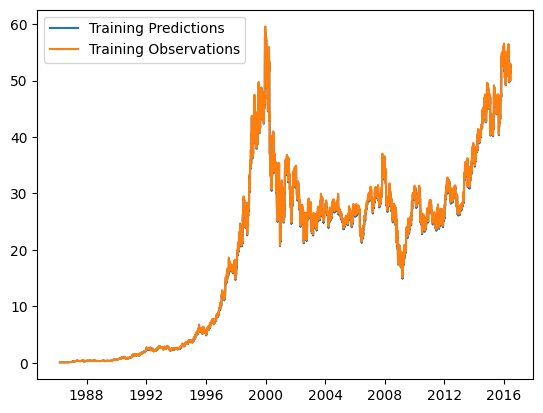

In [14]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

30/30 [==============================] - 0s 3ms/step


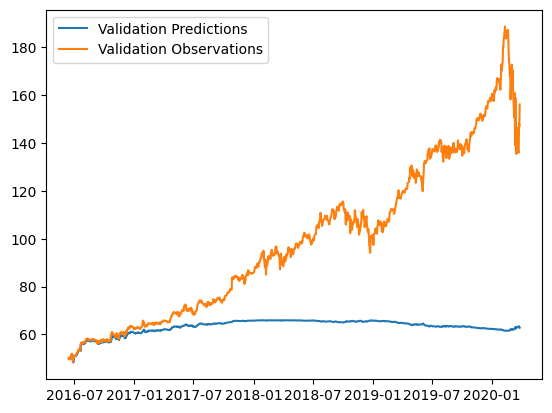

In [15]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

30/30 [==============================] - 0s 3ms/step


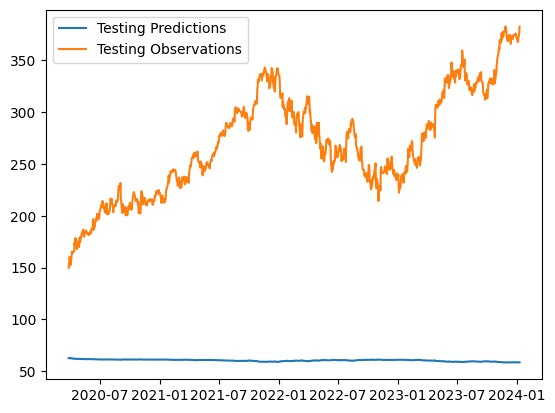

In [16]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

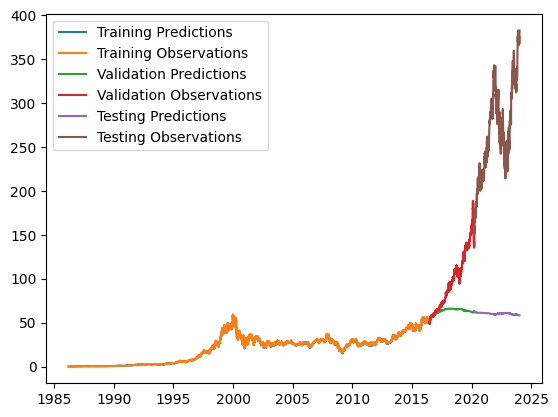

In [17]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [18]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 30ms/step


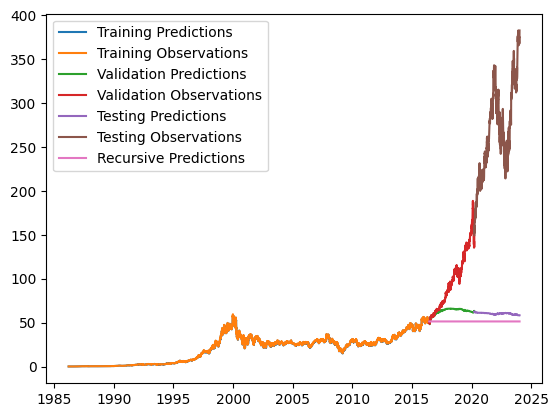

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])